In [1]:
import numpy as np
import BLEanalysis.angleinference as AngleInference
np.set_printoptions(precision=2,suppress=True)
import matplotlib.pyplot as plt
from BLEanalysis.signals import Signals
testsigs = Signals("../bluetooth_experiments/March 26 2025 Field Trial/Range Trials/1.log",['c',],angleOffset=0)
testsigs.summarise()
trainingsigs = Signals("../bluetooth_experiments/no rf amp experiments/noamploc2long.log", 'd', angleOffset = 38)
trainingsigs.summarise()

Standardising angles and times (shifting by 0.00 degrees)
Transmitter       Number of records
        c                 8315
Standardising angles and times (shifting by 38.00 degrees)
Transmitter       Number of records
        d                39557


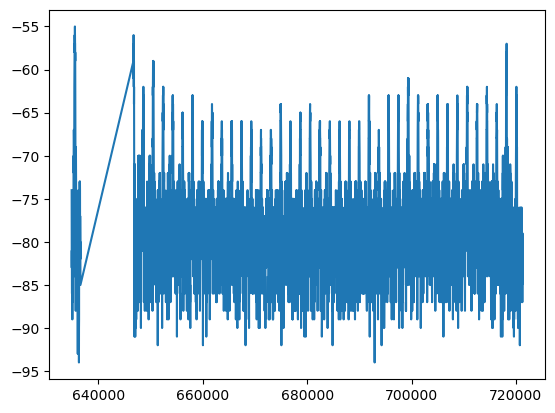

In [2]:
plt.plot([i[3] for i in testsigs.data],[i[0] for i in testsigs.data])
plt.show()

In [3]:
obs, obsangles = testsigs.getSample(1500, 150, target_time = 710000)
obsangles

array([1.64, 2.16,  nan, 3.16, 3.68, 4.17, 4.69, 5.2 , 5.67, 6.18, 0.37,
       0.89, 1.36, 1.88, 2.37])

In [4]:
angles_testset = AngleInference.AnglesUsePatternMeans(trainingsigs,noisevar=10**2) # Create object using training set

In [5]:
logp,errs,avgAtAngles,keptObs = angles_testset.infer(obs,obsangles) # Use infer on the test set of obs and obsangles (angles instead of times)

(0.0, 359.0)

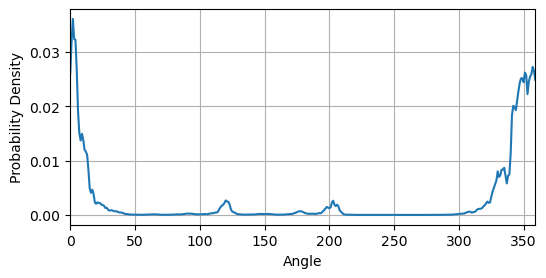

In [6]:
p = np.exp(logp - np.max(logp))
p/= np.sum(p)

####PLOT
plt.figure(figsize=[6,2.8])
#Plot p
plt.plot(p)
#plt.plot(p2,'r--')
plt.grid()
plt.ylabel('Probability Density')
plt.xlabel('Angle')
plt.xlim([0,359])

#plt.vlines(360-100,0,np.max(p)*1.2,color='k',alpha=0.5) #True (ish)

# TEST WITH PEAKS

In [7]:
obs, obsangles = testsigs.getSample(1500, 150, target_time = 670000)
angles_testset = AngleInference.AnglesUsePeaks(3)
angles_testset.infer(obs, obsangles)

C:\Users\chris\anaconda3\envs\newEnv\lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\chris\anaconda3\envs\newEnv\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\chris\anaconda3\envs\newEnv\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.034906585039886195

# Load burst scan data

Using the bee triangulation data...

In [8]:
burstsigstest = Signals("../bluetooth_experiments/bee_triangulation_test/bee4.txt",['c'],filetype='pcap',angleOffset=0)


Standardising angles and times (shifting by 0.00 degrees)


In [9]:
burstsigstest.summarise()
burstsigstest.configureTransmitter('c',0,0,1,1)

Transmitter       Number of records
        c                   50


In [10]:
burst, time = burstsigstest.parseBursts(burstInterval=2000)

Standardising angles and times (shifting by 38.00 degrees)


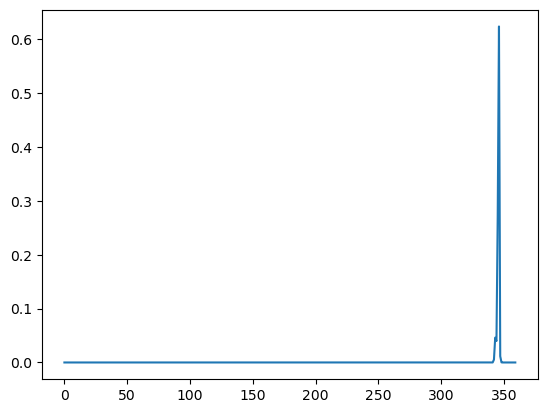

In [11]:
from BLEanalysis.angleinference import AnglesUsePatternMeans, normalise_logs_to_ps
angles = AnglesUsePatternMeans(noisevar=3**2)
import numpy as np
logps,_,_,_ = angles.infer(burst[2]['rssis'],burst[2]['angles'])
plt.plot(np.linspace(0,359,360),normalise_logs_to_ps(logps))

In [12]:
from BLEanalysis.angleinference import AnglesUsePeaks
angles = AnglesUsePeaks(100)
prediction = angles.infer(burst[2]['rssis'],burst[2]['angles'])
print(prediction)
print(time)

5.82939970166106
[7499011, 7571311, 7643933]


Using constant scanning data...

In [13]:
testsigs = Signals("../bluetooth_experiments/March 26 2025 Field Trial/Range Trials/1.log",['c',],angleOffset=0)
testsigs.summarise()
testsigs.configureTransmitter('c',0,0,1,1)

Standardising angles and times (shifting by 0.00 degrees)
Transmitter       Number of records
        c                 8315


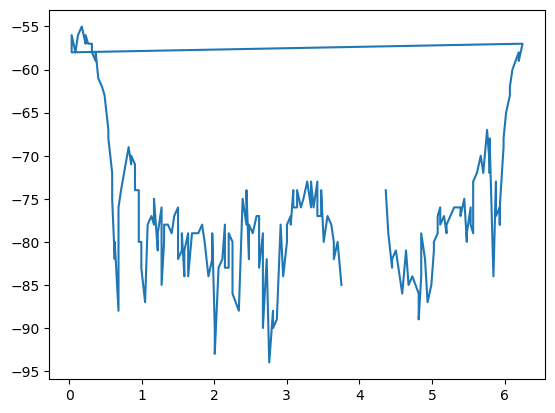

In [22]:
burst, time = testsigs.parseBursts(burstInterval=0)
plt.plot(burst[0]['angles'], burst[0]['rssis'])

Standardising angles and times (shifting by 38.00 degrees)


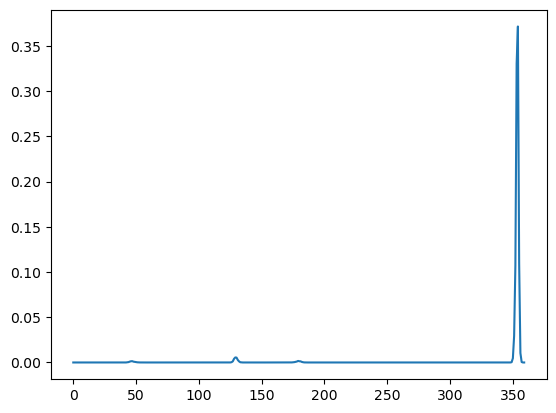

In [24]:
from BLEanalysis.angleinference import AnglesUsePatternMeans, normalise_logs_to_ps
angles = AnglesUsePatternMeans(noisevar=3**2)
import numpy as np
logps,_,_,_ = angles.infer(burst[1]['rssis'],burst[1]['angles'])
plt.plot(np.linspace(0,359,360),normalise_logs_to_ps(logps))